In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error, root_mean_squared_error, confusion_matrix


In [2]:
df = pd.read_csv("student_depression_dataset.csv")
df

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

еда

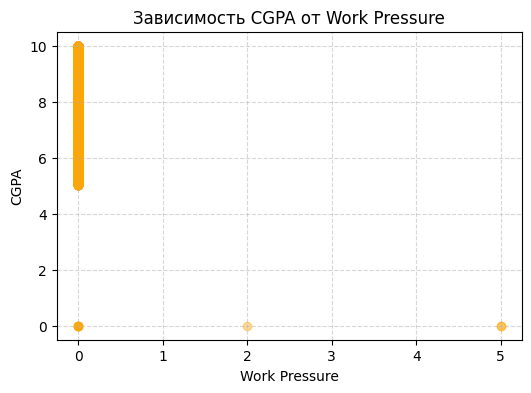

In [4]:
plt.figure(figsize=(6,4))
plt.scatter(df["Work Pressure"], df["CGPA"], alpha=0.4, color="orange")
plt.title("Зависимость CGPA от Work Pressure")
plt.xlabel("Work Pressure")
plt.ylabel("CGPA")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

На графике зависимости CGPA от Work Pressure видно,
что значения Work Pressure почти не различаются (большинство около 0–1),
поэтому точки сгруппированы в одну вертикальную полосу.
Это означает, что данный признак не вносит значимого вклада в объяснение вариации CGPA,
и линейная зависимость между ними практически отсутствует.

/tmp/ipython-input-3627485210.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Study Satisfaction", y="CGPA", data=df, inner="box", palette="muted")


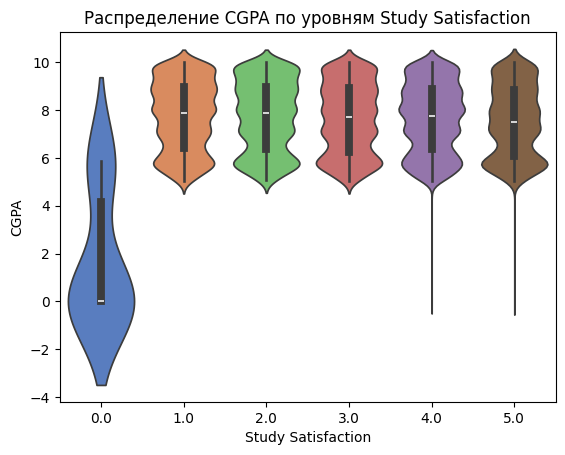

In [5]:
sns.violinplot(x="Study Satisfaction", y="CGPA", data=df, inner="box", palette="muted")
plt.title("Распределение CGPA по уровням Study Satisfaction")
plt.xlabel("Study Satisfaction")
plt.ylabel("CGPA")
plt.show()

виолины и боксплоты это y


Ось X — категории (например, уровни удовлетворённости учёбой).
	•	Ось Y — числовой показатель (например, CGPA).
	•	Форма виолины показывает распределение значений:
	•	широкие участки — больше наблюдений,
	•	узкие — меньше.
	•	Boxplot внутри виолины отображает:
	•	белая точка — медиана,
	•	чёрная коробка — межквартильный диапазон (50% данных),
	•	усы — разброс без выбросов.
	•	Чем выше медиана и уже форма, тем стабильнее и выше результаты в группе.

/tmp/ipython-input-575304659.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Job Satisfaction", y="CGPA", data=df, palette="Set2")


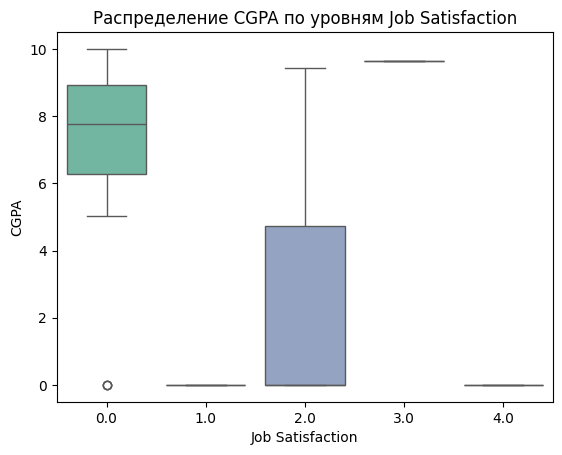

In [6]:
sns.boxplot(x="Job Satisfaction", y="CGPA", data=df, palette="Set2")
plt.title("Распределение CGPA по уровням Job Satisfaction")
plt.xlabel("Job Satisfaction")
plt.ylabel("CGPA")
plt.show()

На графике видно, что при низком уровне удовлетворённости работой (Job Satisfaction = 0) средний балл (CGPA) выше и распределение более стабильное.
При среднем уровне удовлетворённости (Job Satisfaction = 2) разброс оценок значительно больше, а медиана ниже, что указывает на менее устойчивые академические результаты.

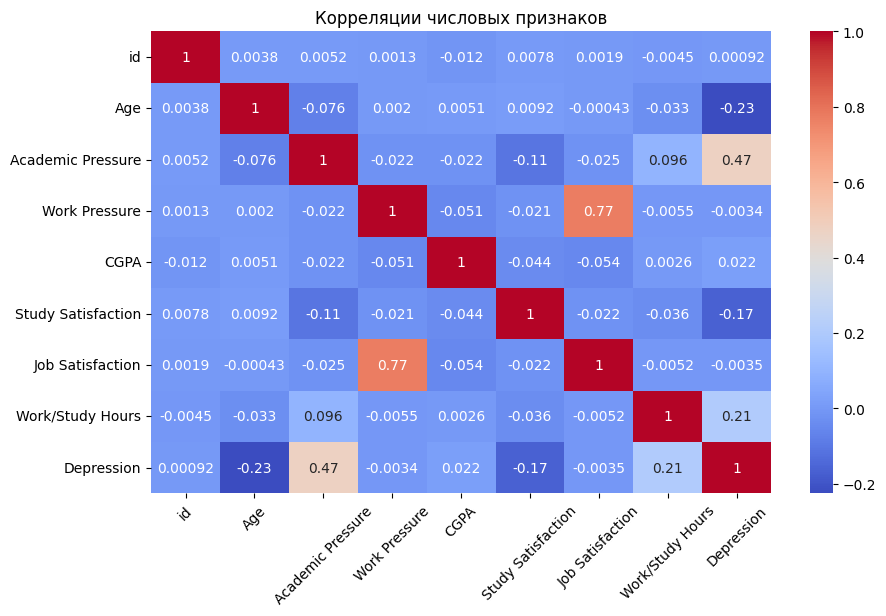

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Корреляции числовых признаков")
plt.xticks(rotation=45)
plt.show()

Корреляции с CGPA:

Age (0.0051) - Очень слабая положительная связь. Возраст практически не влияет.

Academic Pressure (-0.022) - Очень слабая отрицательная связь

Work Pressure (-0.0051) - Почти нулевая корреляция

Study Satisfaction (-0.044) - Слабая отрицательная связь

Job Satisfaction (-0.054) - Слабая отрицательная связь

Work/Study Hours (0.0026) - Почти нулевая связь

Depression (0.022) - Очень слабая положительная связь



замены

In [8]:
# Проверяем общее количество пропусков (NaN)
df.isnull().sum().sum()

np.int64(0)

In [9]:
# Выделяем категориальные признаки
categorial_features = list(df.select_dtypes(include=['object']).columns)
categorial_features

['Gender',
 'City',
 'Profession',
 'Sleep Duration',
 'Dietary Habits',
 'Degree',
 'Have you ever had suicidal thoughts ?',
 'Financial Stress',
 'Family History of Mental Illness']

In [10]:
# Смотрим только категориальные столбцы
df[categorial_features].head()

,Gender,City,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Financial Stress,Family History of Mental Illness
0,Male,Visakhapatnam,Student,'5-6 hours',Healthy,B.Pharm,Yes,1.0,No
1,Female,Bangalore,Student,'5-6 hours',Moderate,BSc,No,2.0,Yes
2,Male,Srinagar,Student,'Less than 5 hours',Healthy,BA,No,1.0,Yes
3,Female,Varanasi,Student,'7-8 hours',Moderate,BCA,Yes,5.0,Yes
4,Female,Jaipur,Student,'5-6 hours',Moderate,M.Tech,Yes,1.0,No


In [11]:
# Смотрим уникальные значения в каждой категориальной колонке
for col in categorial_features:
    print(f"Unique for {col}: {df[col].unique()}\n")

Unique for Gender: ['Male' 'Female']

Unique for City: ['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi' 'Saanvi' 'M.Tech' 'Bhavna' "'Less Delhi'" 'City'
 '3.0' "'Less than 5 Kalyan'" 'Mira' 'Harsha' 'Vaanya' 'Gaurav' 'Harsh'
 'Reyansh' 'Kibara' 'Rashi' 'ME' 'M.Com' 'Nalyan' 'Mihir' 'Nalini'
 'Nandini' 'Khaziabad']

Unique for Profession: ['Student' "'Civil Engineer'" 'Architect' "'UX/UI Designer'"
 "'Digital Marketer'" "'Content Writer'" "'Educational Consultant'"
 'Teacher' 'Manager' 'Chef' 'Doctor' 'Lawyer' 'Entrepreneur' 'Pharmacist']

Unique for Sleep Duration: ["'5-6 hours'" "'Less than 5 hours'" "'7-8 hours'" "'More than 8 hours'"
 'Others']

Unique for Dietary Habits: ['Healthy' 'Moderate' 'Unhealthy' 'Others']

Unique for Degr

In [12]:
# Заменяем "?" на NaN и приводим к числовому типу
df["Financial Stress"] = df["Financial Stress"].replace("?", np.nan)
df["Financial Stress"] = df["Financial Stress"].astype(float)

df["Financial Stress"].isna().sum()

np.int64(3)

In [13]:
# Заполняем пропуски модой
fin_mode = df["Financial Stress"].mode()[0]
df["Financial Stress"] = df["Financial Stress"].fillna(fin_mode)

df["Financial Stress"].isna().sum()

np.int64(0)

Сначала я проверила наличие пропусков в датасете с помощью df.isnull().sum().sum() – явных NaN не оказалось.
Затем я выделила категориальные признаки и посмотрела уникальные значения в каждом из них.
При анализе столбца Financial Stress обнаружила, что среди значений присутствует строка '?', которая не является корректным числовым значением.
Поэтому я заменила '?' на NaN, а затем заполнила эти пропуски модой по столбцу.

In [23]:
df = df[df['Financial Stress'] != '?']
df['Financial Stress'] = df['Financial Stress'].astype(float)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [25]:
categorial_features = list(df.select_dtypes(include=['object']).columns)
numeric_features = list(df.select_dtypes(include=['float', 'int']).columns)

In [26]:
binary_cols = [i for i in categorial_features if df[i].nunique() == 2]#2знач
caterigal_cols = [i for i in categorial_features if df[i].nunique() > 2]#остальное

In [27]:
le = LabelEncoder()
for i in binary_cols:
    df[i] = le.fit_transform(df[i])

In [28]:
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(df[caterigal_cols])

In [29]:
X_encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out())
X_encoded

,City_'Less Delhi',City_'Less than 5 Kalyan',City_3.0,City_Agra,City_Ahmedabad,City_Bangalore,City_Bhavna,City_Bhopal,City_Chennai,City_City,...,Degree_MA,Degree_MBA,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
27899,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
df = df.drop(caterigal_cols, axis=1)
df = pd.concat([df.reset_index(drop=True), X_encoded.reset_index(drop=True)], axis=1)

In [31]:
df

,id,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Have you ever had suicidal thoughts ?,Work/Study Hours,...,Degree_MA,Degree_MBA,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD
0,2,1,33.0,5.0,0.0,8.97,2.0,0.0,1,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8,0,24.0,2.0,0.0,5.90,5.0,0.0,0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,26,1,31.0,3.0,0.0,7.03,5.0,0.0,0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30,0,28.0,3.0,0.0,5.59,2.0,0.0,1,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,32,0,25.0,4.0,0.0,8.13,3.0,0.0,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,0,27.0,5.0,0.0,5.75,5.0,0.0,1,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27897,140686,1,27.0,2.0,0.0,9.40,3.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27898,140689,1,31.0,3.0,0.0,6.61,4.0,0.0,0,12.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
27899,140690,0,18.0,5.0,0.0,6.88,2.0,0.0,1,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
df.isnull().sum().sum()

np.int64(0)

In [33]:
scaler = StandardScaler()
df[numeric_features[1:]] = scaler.fit_transform(df[numeric_features[1:]])

In [36]:
best_features1 = ["Depression", "Job Satisfaction", "Academic Pressure", "Study Satisfaction"]

In [37]:
X = df.drop("CGPA", axis=1)
y = df["CGPA"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_best = df[best_features1]

X_train_best, X_test_best, y_train_best, y_test_best = train_test_split(X_best, y, test_size=0.33, random_state=42)


In [38]:
def graph_coef(coefs, feature_names):

    sns.barplot(coefs, feature_names, orient="h")
    plt.xlabel('Коэффициенты')
    plt.show()

In [39]:
def metrics(y, y_pred):
    mae = mean_absolute_error(y, y_pred)
    mape = mean_absolute_percentage_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = root_mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print('MAE %.3f' % mae)
    print('R2=%.3f' % r2)
    print('MAPE=%.3f, MAPE_as_percent=%.3f%s' % (mape, mape * 100, '%'))
    print('MSE=%.3f' % mse)
    print('RMSE=%.3f' % rmse)

In [40]:
model1 = LinearRegression()
model1.fit(X, y)

LinearRegression()

In [41]:
y_pred1 = model1.predict(X)

In [42]:
metrics(y, y_pred1)

MAE 0.851
R2=0.026
MAPE=1.081, MAPE_as_percent=108.091%
MSE=0.974
RMSE=0.987


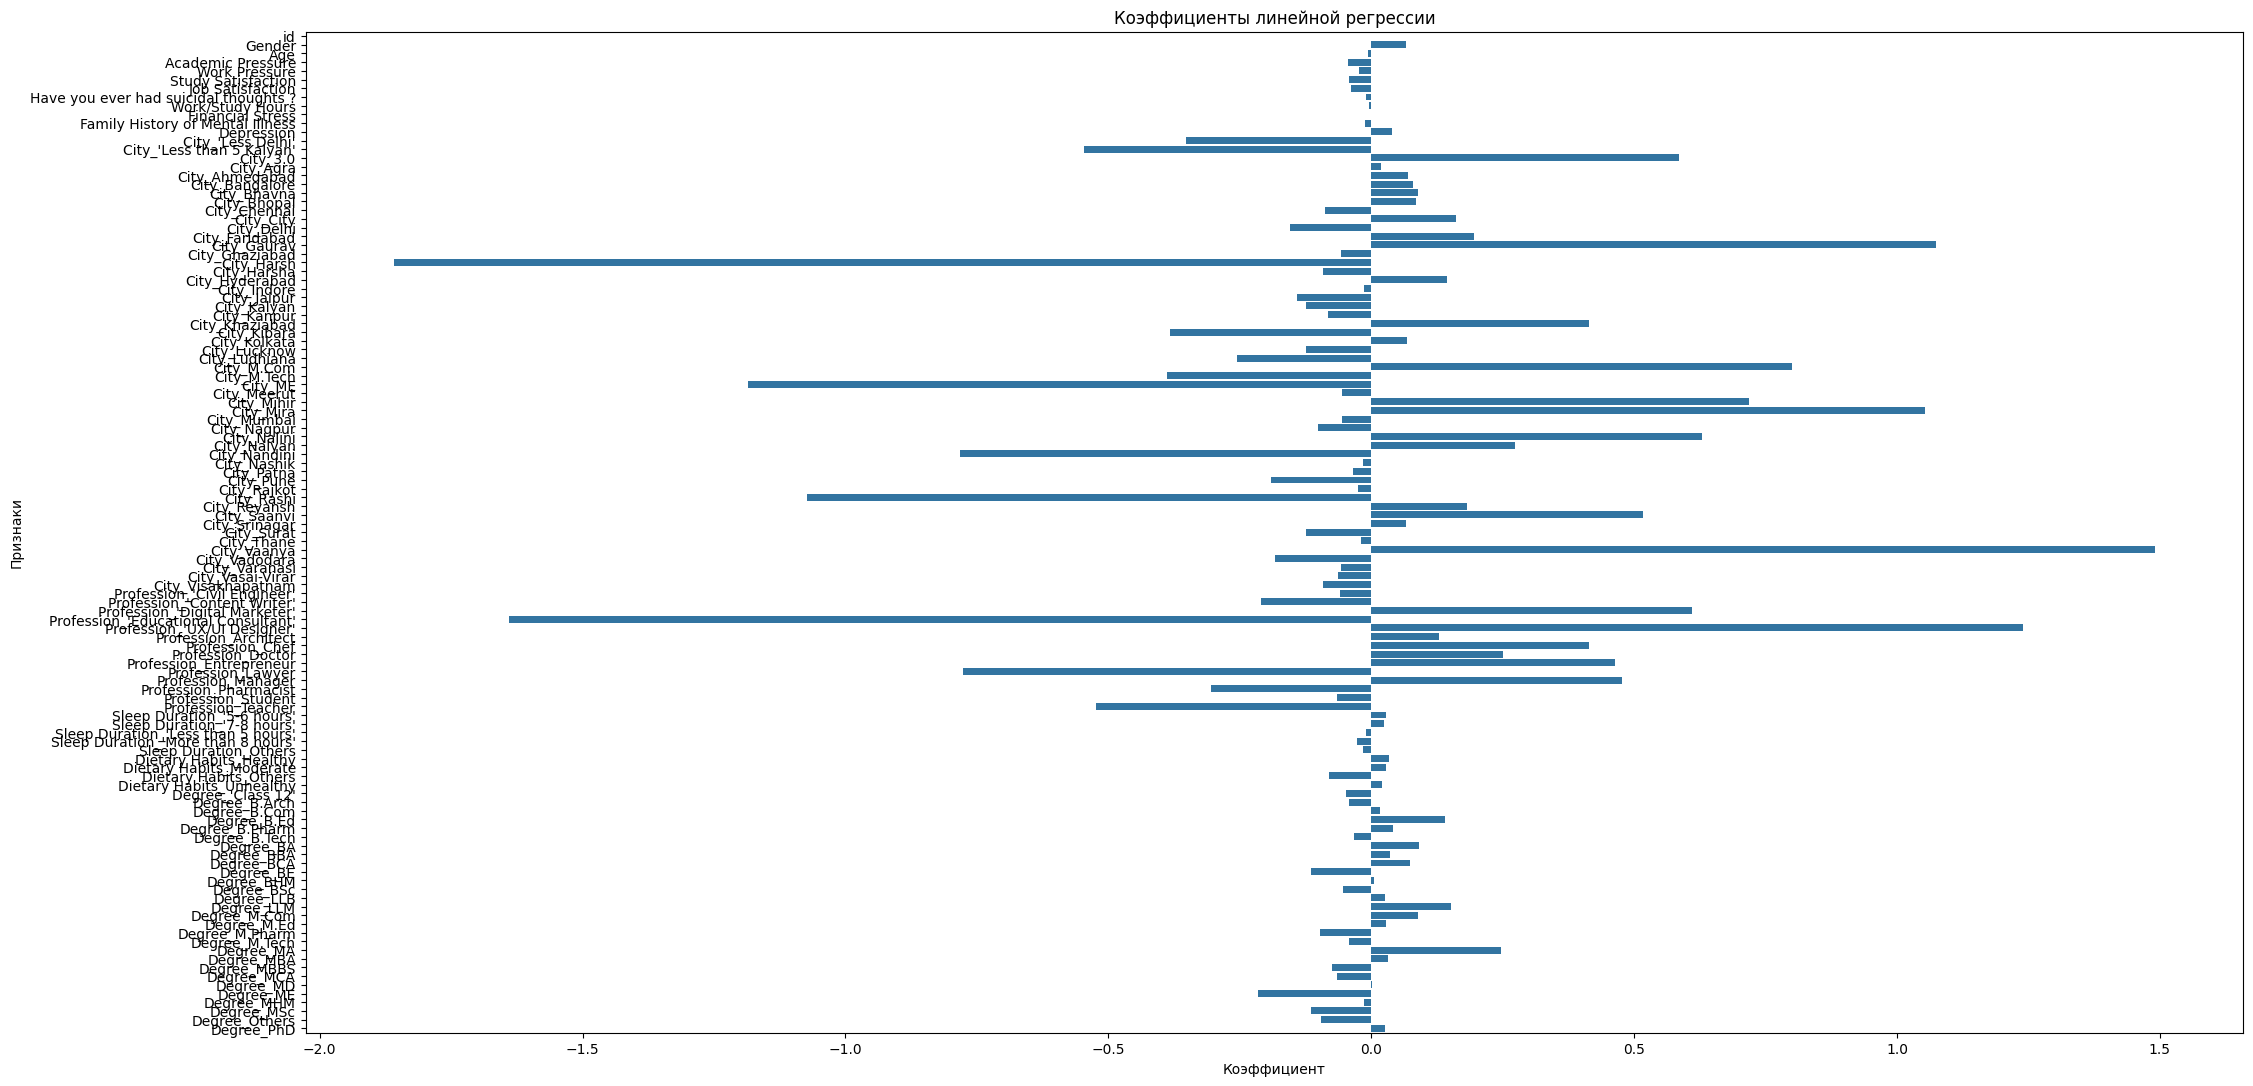

In [43]:
plt.figure(figsize=(25,13))
sns.barplot(x=model1.coef_, y=X.columns, orient="h")
plt.xlabel("Коэффициент")
plt.ylabel("Признаки")
plt.title("Коэффициенты линейной регрессии")
plt.show()

In [44]:
model2 = LinearRegression()
model2.fit(X_train, y_train)

LinearRegression()

In [45]:
y_train_pred2 = model2.predict(X_train)
y_test_pred2 = model2.predict(X_test)

In [46]:
metrics(y_train, y_train_pred2)

MAE 0.851
R2=0.028
MAPE=1.092, MAPE_as_percent=109.179%
MSE=0.975
RMSE=0.987


In [47]:
metrics(y_test, y_test_pred2)

MAE 0.855
R2=-0.004
MAPE=1.095, MAPE_as_percent=109.503%
MSE=0.999
RMSE=1.000


Исходя из метрик всё плохо

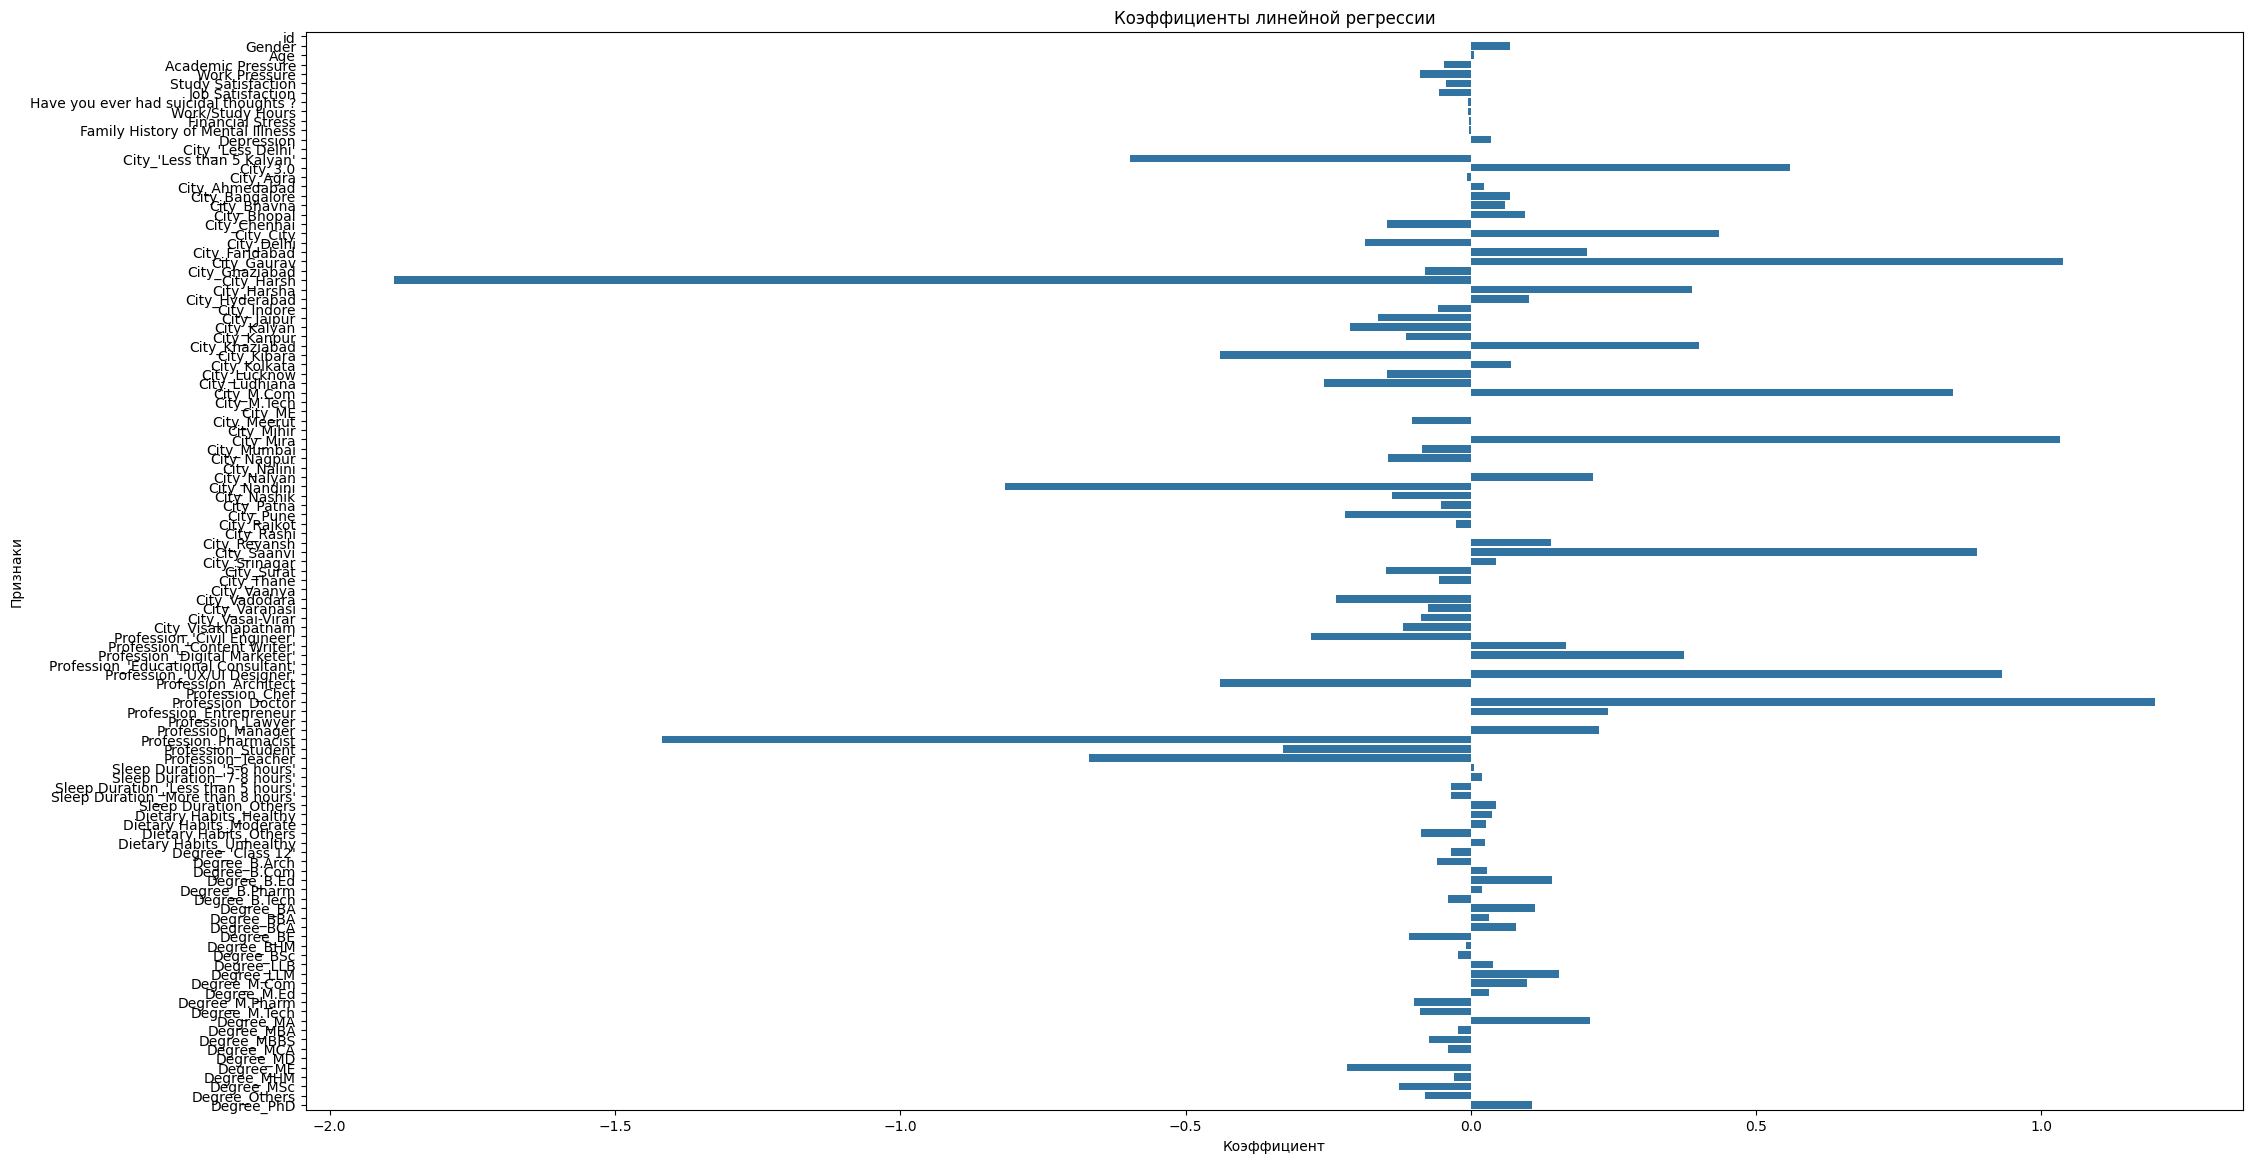

In [48]:
plt.figure(figsize=(25,14))
sns.barplot(x=model2.coef_, y=X.columns, orient="h")
plt.xlabel("Коэффициент")
plt.ylabel("Признаки")
plt.title("Коэффициенты линейной регрессии")
plt.show()

In [49]:
model3 = LinearRegression()
model3.fit(X_best, y)

LinearRegression()

In [50]:
y_pred3 = model3.predict(X_best)

In [51]:
metrics(y, y_pred3)

MAE 0.863
R2=0.007
MAPE=1.025, MAPE_as_percent=102.542%
MSE=0.993
RMSE=0.997


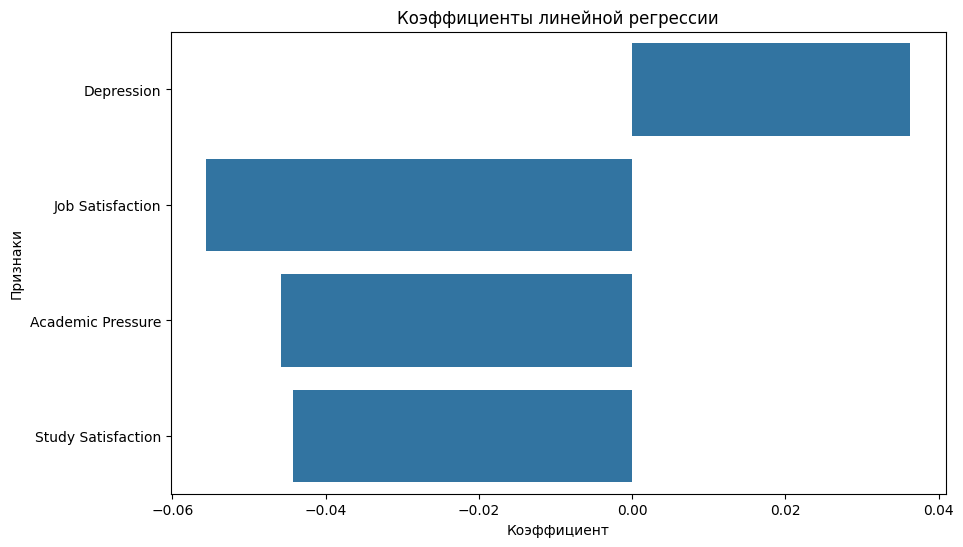

In [52]:
plt.figure(figsize=(10,6))
sns.barplot(x=model3.coef_, y=X_best.columns, orient="h")
plt.xlabel("Коэффициент")
plt.ylabel("Признаки")
plt.title("Коэффициенты линейной регрессии")
plt.show()

In [53]:
model4 = LinearRegression()
model4.fit(X_train_best, y_train_best)

LinearRegression()

In [54]:
y_pred4_train = model4.predict(X_train_best)

y_pred4_test = model4.predict(X_test_best)

In [55]:
metrics(y_train_best, y_pred4_train)

MAE 0.864
R2=0.006
MAPE=1.027, MAPE_as_percent=102.749%
MSE=0.996
RMSE=0.998


In [56]:
metrics(y_test_best, y_pred4_test)

MAE 0.860
R2=0.008
MAPE=1.022, MAPE_as_percent=102.208%
MSE=0.987
RMSE=0.994


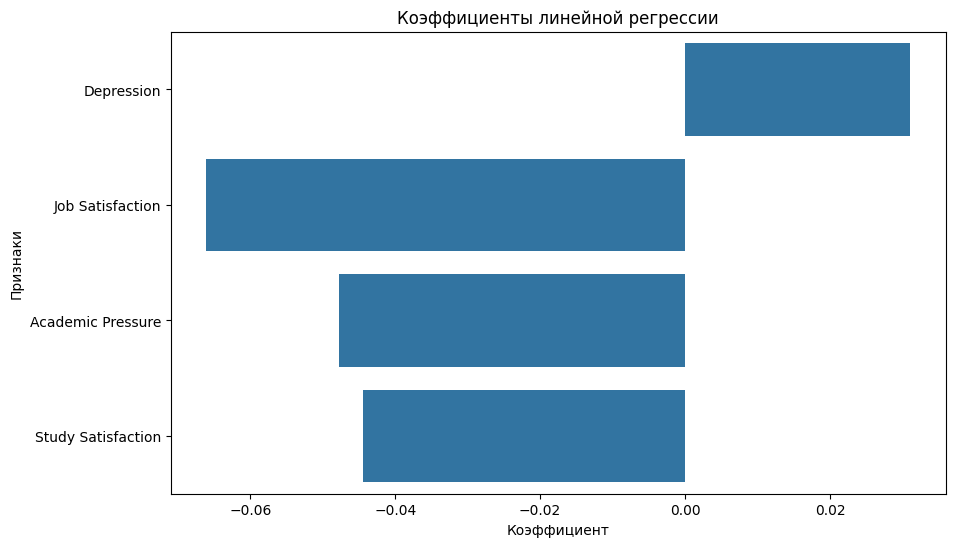

In [57]:
plt.figure(figsize=(10,6))
sns.barplot(x=model4.coef_, y=X_train_best.columns, orient="h")
plt.xlabel("Коэффициент")
plt.ylabel("Признаки")
plt.title("Коэффициенты линейной регрессии")
plt.show()